<a href="https://colab.research.google.com/github/jakew4/project2/blob/main/project2part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL Combine Perfomance Data from 2009-2019
Jacob Wang - 11/02/2022

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
filename = '/content/NFL.csv'
df = pd.read_csv(filename)
df.info()
df.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  2927 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2254 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes
5,2009,Trevor Canfield\CanfTr20,23.0,Cincinnati,1.9304,139.252858,5.28,NaN,29.0,NaN,NaN,NaN,Arizona Cardinals / 7th / 254th pick / 2009,37.368830,offense,offensive_lineman,OG,Yes
6,2009,Peria Jerry\JerrPe99,24.0,Mississippi,1.8796,135.624119,4.98,NaN,NaN,NaN,NaN,NaN,Atlanta Falcons / 1st / 24th pick / 2009,38.388934,defense,defensive_lineman,DT,Yes
7,2009,Garrett Reynolds\ReynGa20,21.0,North Carolina,2.0320,140.160042,5.32,55.88,19.0,238.76,7.87,4.88,Atlanta Falcons / 5th / 156th pick / 2009,33.945078,offense,offensive_lineman,OT,Yes


# Data Cleaning

In [5]:
# create copy of original df
ml_df = df.copy()

In [6]:
# Delete unnecessary columns 
ml_df = ml_df.drop(columns = ['Year', 'Player', 'Drafted..tm.rnd.yr.'])

We can drop year and player name because these will likely not affect our analysis. The 'Drafted..tm.rnd.yr' column can also be dropped, because this column essentially tell us whether or not the player was drafted. The 'Drafted' column also contains this information so unless we want to find what round each player was picked, we can drop this column. 

In [7]:
# Determine if there are duplicate rows
ml_df.duplicated().sum()

0

NO duplicates

In [8]:
# Identify missing values:
ml_df.isna().sum()

Age                  550
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position_Type          0
Position               0
Drafted                0
dtype: int64

Address missing values: There are an excess of missing numerical values in various columns because some position types will only participate in certain combine exercises. For example, an offensive lineman would be more likely to participate in exercises that showcase strength such as the bench press. Similarly, a running back or wide receiver would be more likely to participate in events that showcase speed and agility such as the agility 3-cone event or 40 yard dash. To fill in these missing values, I will simply insert the average of the column using SimpleImputer. This shouldn't affect analysis too heavily, as the most important data from each player most likely won't be missing. Will NOT fill in missing values here since this will result in data leakage when we begin modeling. I will fill missing values with preprocessing pipeline when the time comes. 

In [9]:
# Identify and address categorical inconsistencies
ml_df['Drafted'].value_counts()
ml_df['School'].value_counts()
ml_df['Position'].value_counts()
ml_df['Position_Type'].value_counts()
ml_df['Player_Type'].value_counts()

offense          1815
defense          1538
special_teams     124
Name: Player_Type, dtype: int64

All categorical columns are in order.

In [10]:
# identify numerical outliers 
ml_df['Age'].describe()
ml_df['Height'].describe()
ml_df['Weight'].describe()
ml_df['Sprint_40yd'].describe()
ml_df['Bench_Press_Reps'].describe()
ml_df['Vertical_Jump'].describe()
ml_df['Broad_Jump'].describe()
ml_df['Shuttle'].describe()
ml_df['Agility_3cone'].describe()
ml_df['BMI'].describe()

count    3477.000000
mean       31.074417
std         4.438279
min        21.609798
25%        27.475641
50%        30.122626
75%        34.038647
max        44.680097
Name: BMI, dtype: float64

There does not seem to be any significant outliers in the numerical data. 

# Exploratory Visuals

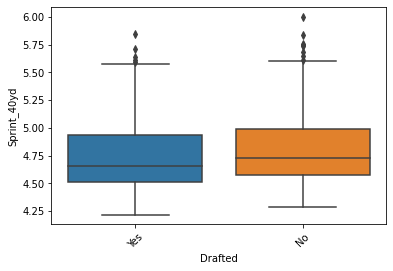

In [11]:
# Create boxplots to view statistical summaries of 40yd dash times
# and whether or not player was drafted
sns.boxplot(x = 'Drafted', y = 'Sprint_40yd', data = ml_df)
plt.xticks(rotation = 45);

As can be expected, those with a faster 40-yard dash time are slightly more likely to be drafted. The amount of slower times is higher amongst undrafted players. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  2927 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2254 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

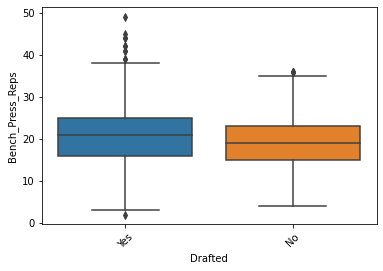

In [19]:
# create boxplot of bench press reps and drafted (Yes/No)
sns.boxplot(x = 'Drafted', y = 'Bench_Press_Reps', data = ml_df)
plt.xticks(rotation = 45);

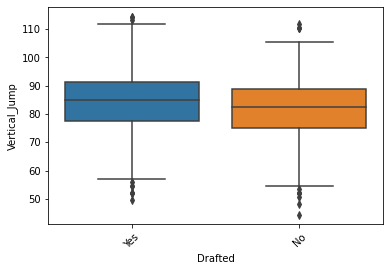

In [21]:
# create boxplot of vertical jump stats and drafted (Yes/No)
sns.boxplot(x = 'Drafted', y = 'Vertical_Jump', data = ml_df)
plt.xticks(rotation = 45);

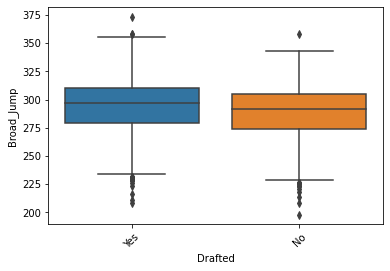

In [22]:
# create boxplot of broad jump stats and drafted (Yes/No)
sns.boxplot(x = 'Drafted', y = 'Broad_Jump', data = ml_df)
plt.xticks(rotation = 45);

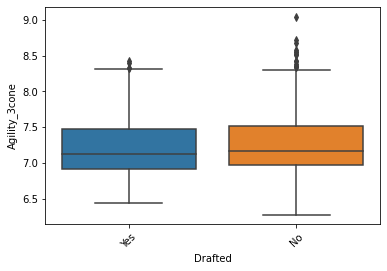

In [23]:
# create boxplot of agility cone drill stats and drafted (Yes/No)
sns.boxplot(x = 'Drafted', y = 'Agility_3cone', data = ml_df)
plt.xticks(rotation = 45);

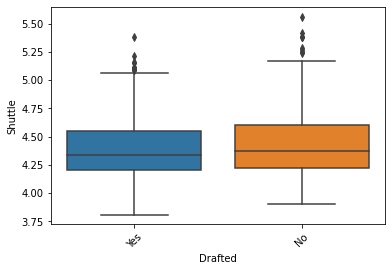

In [24]:
# create boxplot of shuttle run stats and drafted (Yes/No)
sns.boxplot(x = 'Drafted', y = 'Shuttle', data = ml_df)
plt.xticks(rotation = 45);

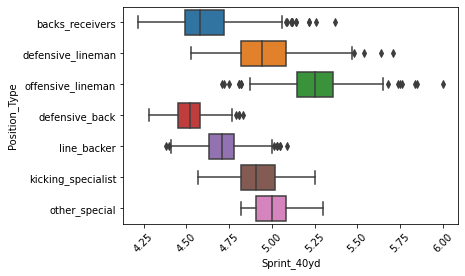

In [13]:
# Create boxplots to view statistical summaries of 40yd dash times
# by position type
sns.boxplot(y = 'Position_Type', x = 'Sprint_40yd', data = ml_df)
plt.xticks(rotation = 45);

As expected, skill position types such as backs/receivers and defensive backs are on average, quicker than the rest of position types. Offensive and defensive linemen have the slowest times, as they typically weigh much more than other position types. 

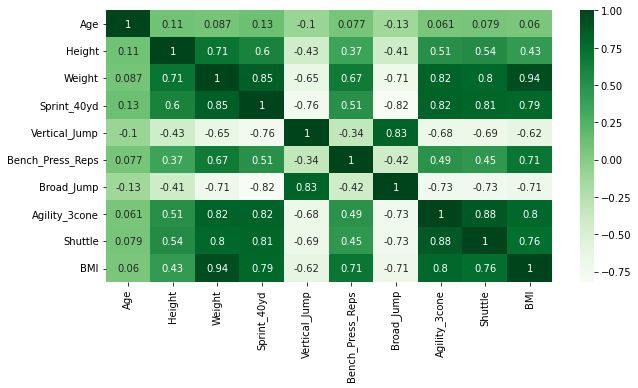

In [14]:
# Display a correlation heatmap of features
corr = ml_df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, cmap = 'Greens', annot = True);

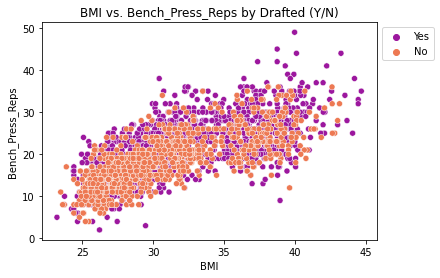

In [15]:
# display scatterplot of BMI vs. Bench_Press_Reps by Drafted (Y/N)
ax = sns.scatterplot(data = ml_df, x = 'BMI', y = 'Bench_Press_Reps', hue = 'Drafted', palette = 'plasma')
ax.set_title('BMI vs. Bench_Press_Reps by Drafted (Y/N)')
ax.set_xlabel('BMI')
ax.legend(bbox_to_anchor = [1,1]);

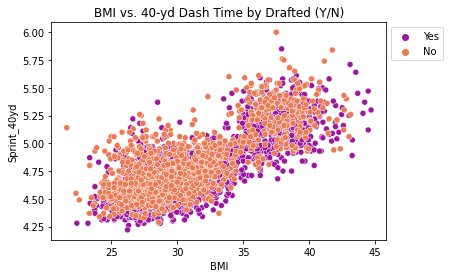

In [16]:
# display scatterplot of BMI vs. 40-Yard Dash time by Drafted (Y/N)
ax = sns.scatterplot(data = ml_df, x = 'BMI', y = 'Sprint_40yd', hue = 'Drafted', palette = 'plasma')
ax.set_title('BMI vs. 40-yd Dash Time by Drafted (Y/N)')
ax.set_xlabel('BMI')
ax.legend(bbox_to_anchor = [1,1]);

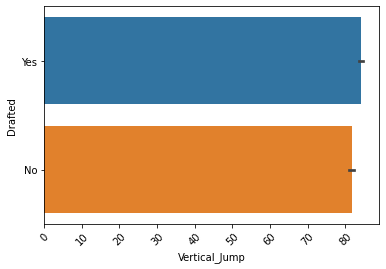

In [17]:
# Create barplot of 'Vertical_jump' and 'Drafted';
sns.barplot(data = df, x = 'Vertical_Jump', y ='Drafted');
plt.xticks(rotation=45);

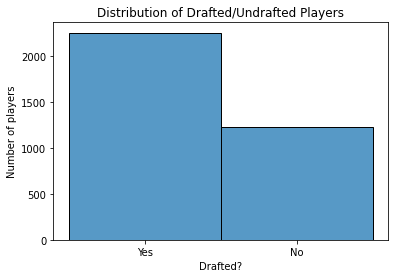

In [18]:
# Create histogram of 'Drafted' column
sns.histplot(data = ml_df, x = 'Drafted');
plt.title('Distribution of Drafted/Undrafted Players')
plt.ylabel('Number of players');
plt.xlabel('Drafted?');